-------- PART ONE ☝ --------

Importing Libraries 📚

In [263]:
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Reading csv file and change it to DataFrame 📑

In [61]:
IMDB_df = pd.read_csv("IMDB_Movies.csv")
IMDB_character_df = pd.read_csv("IMDB_Names.csv")


IMDB_df["gross_us_canada"] = IMDB_df["gross_us_canada"].fillna(0).astype(int)#.replace(0, "Not provided")
IMDB_df["parental_guide"] = IMDB_df["parental_guide"].fillna("Unrated")
IMDB_df.loc[IMDB_df["parental_guide"].isin(["None", "", "Not Rated"]), "parental_guide"] = "Unrated"
IMDB_df = IMDB_df.astype({"title": "string", "parental_guide": "string", "genre": "string", "director": "string", "writer": "string", "star": "string"})
IMDB_df = IMDB_df.astype({"id": "int32", "year": "int32", "runtime": "int32"})

Filtering by movies release year 📅

In [ ]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None) 
start_year = int(input("Please provide the start year : "))
end_year = int(input("Please provide the end year : "))
sorted_df = IMDB_df.sort_values("year", ascending = True)
sorted_df = sorted_df[(sorted_df["year"] >= start_year) & (sorted_df["year"] <= end_year)]
display(sorted_df)

Filtering by movies runtime 🕕

In [ ]:
start_runtime = int(input("Please provide the start runtime : "))
end_runtime = int(input("Please provide the end runtime : "))
sorted_df = IMDB_df.sort_values("runtime", ascending = True)
sorted_df = sorted_df[(sorted_df["runtime"] >= start_runtime) & (sorted_df["runtime"] <= end_runtime)]
display(sorted_df)

Filtering by movies stars 🗣

In [ ]:
actors_name = input("Please provide your favorite actors with ' - ' between them : ").split(" - ")

m_list, s_list = [], []

for i in range(len(IMDB_df)):
    for j in actors_name:
        if j in IMDB_df.loc[i, "star"]:
            m_list += [IMDB_df.loc[i, "title"]]
            s_list += [IMDB_df.loc[i, "star"]]

actors_df = pd.DataFrame({"movie" : m_list, "star" : s_list})

display(actors_df.drop_duplicates())

Filtering by movies genre 🐱‍🐉

In [227]:
required_genre = input("Please provide your required genre : ")

m2_list, g_list = [], []

for i in range(len(IMDB_df)):
    if required_genre in IMDB_df.loc[i, "genre"]:
            m2_list += [IMDB_df.loc[i, "title"]]
            g_list += [IMDB_df.loc[i, "genre"]]

genre_df = pd.DataFrame({"movie" : m2_list, "genre" : g_list})

display(genre_df)

,movie,genre
0,Star Wars: Episode V - The Empire Strikes Back,"Action, Adventure, Fantasy"
1,It's a Wonderful Life,"Drama, Family, Fantasy"
2,The Green Mile,"Crime, Drama, Fantasy"
3,Star Wars: Episode IV - A New Hope,"Action, Adventure, Fantasy"
4,Your Name.,"Animation, Drama, Fantasy"
5,Star Wars: Episode VI - Return of the Jedi,"Action, Adventure, Fantasy"
6,Pan's Labyrinth,"Drama, Fantasy, War"
7,Monty Python and the Holy Grail,"Adventure, Comedy, Fantasy"
8,Spider-Man: No Way Home,"Action, Adventure, Fantasy"
9,Harry Potter and the Deathly Hallows: Part 2,"Adventure, Family, Fantasy"


-------- PART TWO ✌ --------

10 most selling Movies 🤛

C:\Users\milad\AppData\Local\Temp\ipykernel_35428\1993176977.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.2)


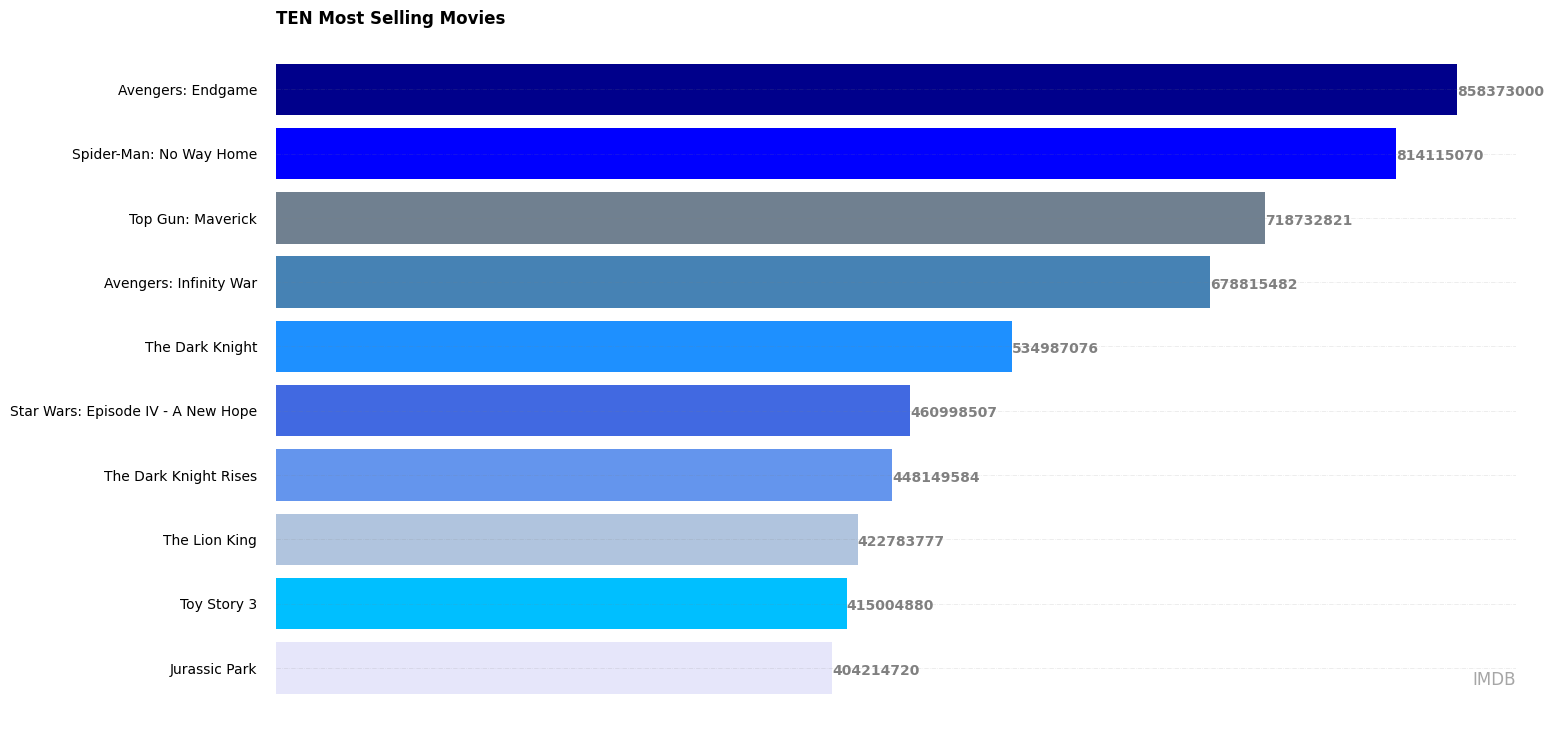

In [100]:
sorted_df = IMDB_df.sort_values("gross_us_canada", ascending = False)

name = sorted_df["title"].head(10)
price = sorted_df["gross_us_canada"].head(10)

fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(name, price, color = ["darkblue", "blue", "slategray", "steelblue", "dodgerblue", "royalblue", "cornflowerblue", "lightsteelblue", "deepskyblue", "lavender"])

for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color = "grey", linestyle = "-.", linewidth = 0.5, alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y() + 0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = "bold", color = "grey")

ax.set_title("TEN Most Selling Movies", loc = "left", fontweight = "bold")
fig.text(0.9, 0.15, "IMDB", fontsize = 12, color = "grey", ha = "right", va = "bottom", alpha = 0.7)

plt.xticks([])

plt.show()

5 most prolific actors 💃🕺

In [174]:
my_database = mysql.connector.connect(
  host = "127.0.0.1",
  port = "3306",
  user = "root",
  password = "milin380",
  auth_plugin = "mysql_native_password",
  database = "my_db"
)

my_cursor = my_database.cursor()
my_cursor.execute("SELECT person.name, COUNT(cast.movie_id) AS movie_count FROM person JOIN cast ON person.id = cast.person_id GROUP BY person.id ORDER BY movie_count DESC LIMIT 5")
prolific_list = my_cursor.fetchall()

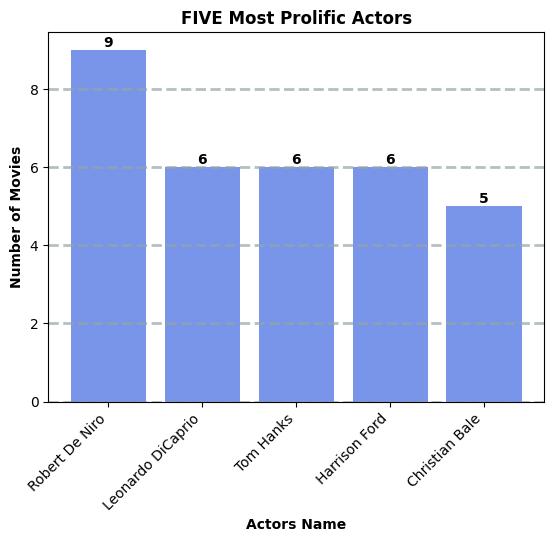

In [121]:
prolific_names, prolific_numbers = [], []
for i in prolific_list:
    prolific_names += [i[0]]
    prolific_numbers += [i[1]]

plt.bar(prolific_names, prolific_numbers, color = "royalblue", alpha = 0.7)
plt.grid(color = "#95a5a6", linestyle = "--", linewidth = 2, axis = "y", alpha = 0.7)
plt.xticks(rotation = 45, ha = "right")
plt.title("FIVE Most Prolific Actors", fontweight = "bold")

plt.xlabel("Actors Name", fontweight = "bold")
plt.ylabel("Number of Movies", fontweight = "bold")

for i in range(len(prolific_names)):
    plt.text(prolific_names[i], prolific_numbers[i], str(prolific_numbers[i]), ha = "center", va = "bottom", fontweight = "bold")

plt.show()

Number of Genres 🍹

In [154]:
my_cursor = my_database.cursor()
my_cursor.execute("SELECT genre, COUNT(movie_id) AS num_movies FROM genre GROUP BY genre ORDER BY num_movies DESC")
genre_list = my_cursor.fetchall()

genre_name_list, genre_number_list = [], []
for i in genre_list:
    genre_name_list += [i[0]]
    genre_number_list += [i[1]]

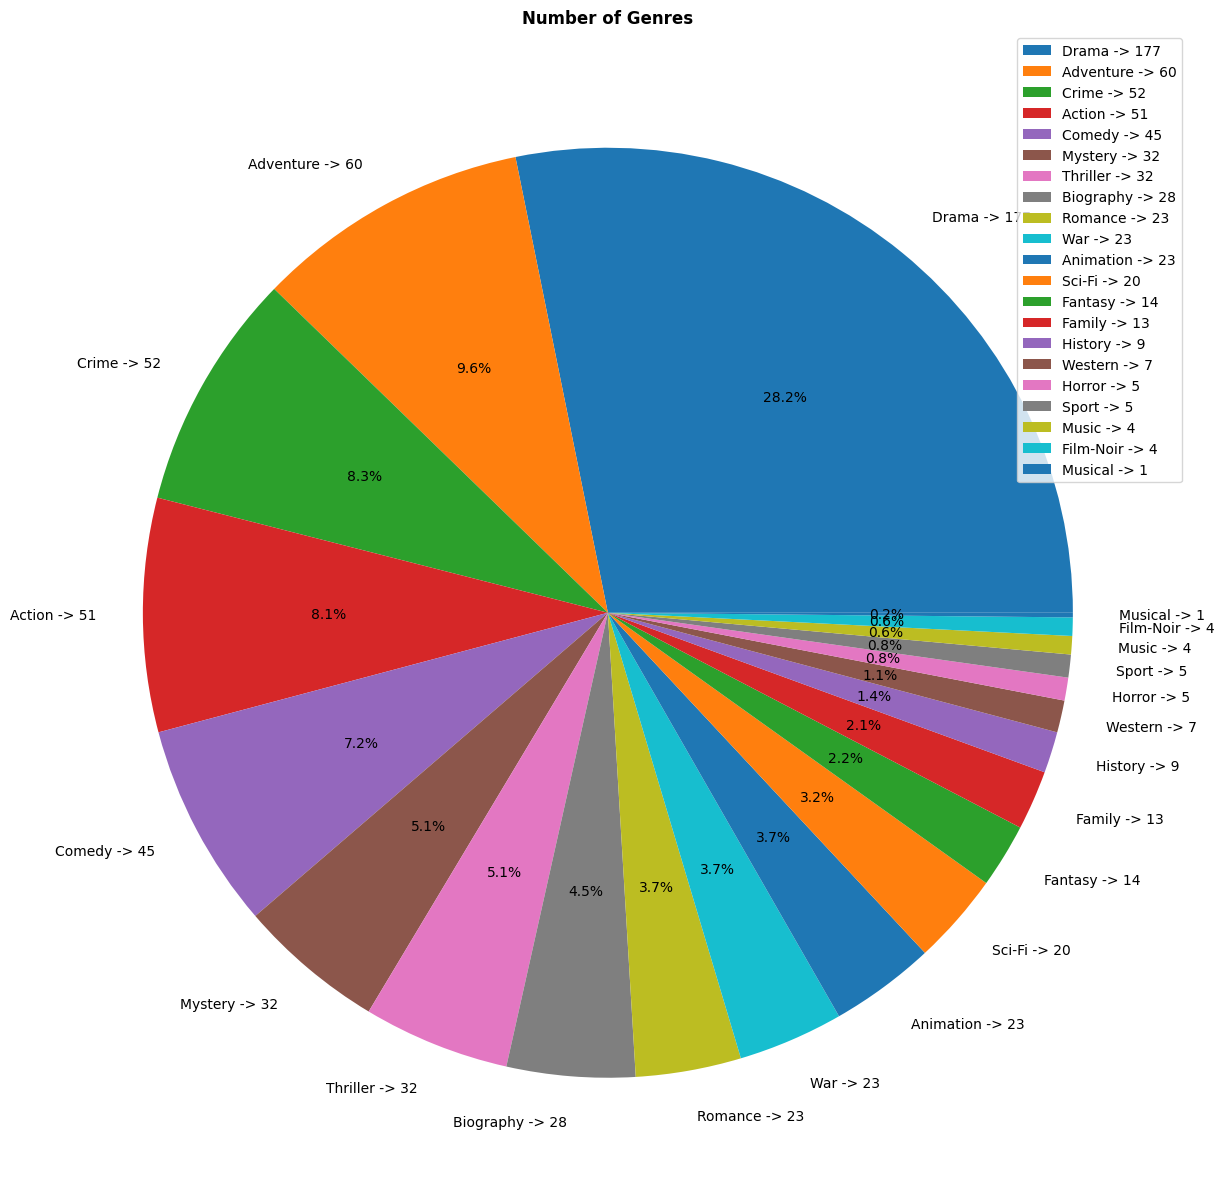

In [155]:
plt.figure(figsize = (15, 30))
plt.pie(np.array(genre_number_list), labels = ["{} -> {}".format(name, value) for name, value in zip(genre_name_list, genre_number_list)], autopct = "%1.1f%%")
plt.legend()
plt.title("Number of Genres", fontweight = "bold")
plt.show()

Number of Parental Guide 🧁

In [157]:
my_cursor = my_database.cursor()
my_cursor.execute("SELECT parental_guide, COUNT(title) as title_count FROM movie GROUP BY parental_guide ORDER BY title_count DESC")
parental_guide_list = my_cursor.fetchall()

parental_guide_name_list, parental_guide_number_list = [], []
for i in parental_guide_list:
    parental_guide_name_list += [i[0]]
    parental_guide_number_list += [i[1]]

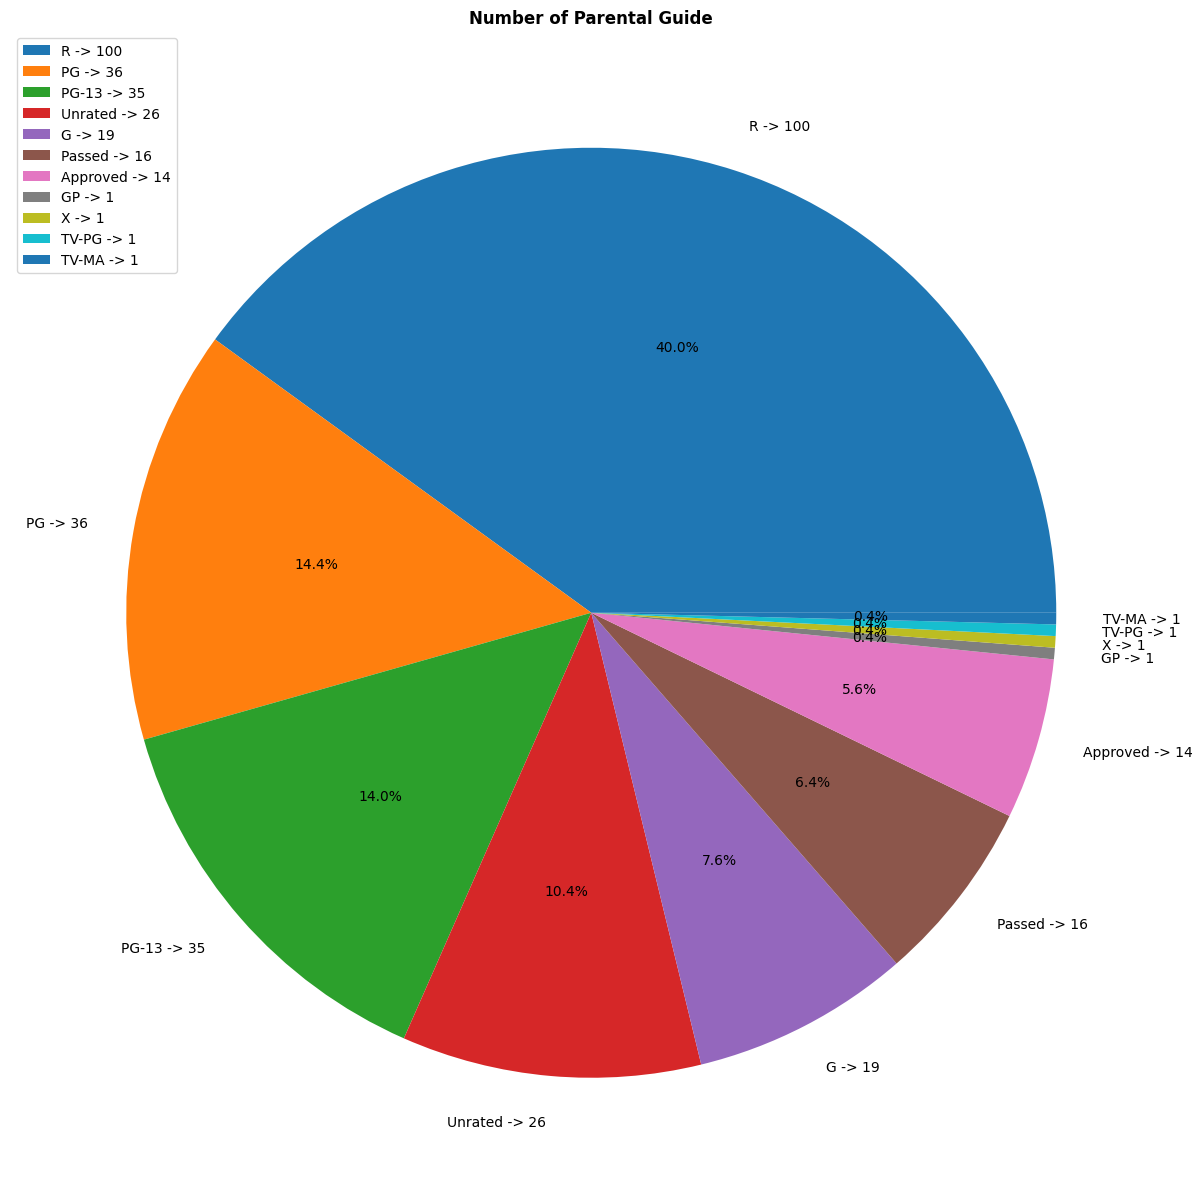

In [168]:
plt.figure(figsize = (15, 25))
plt.pie(np.array(parental_guide_number_list), labels = ["{} -> {}".format(name, value) for name, value in zip(parental_guide_name_list, parental_guide_number_list)], autopct = "%1.1f%%")
plt.legend()
plt.title("Number of Parental Guide", fontweight = "bold")
plt.show()

Number of each Genre for each Parental Guide 🗽

In [175]:
my_cursor = my_database.cursor()
my_cursor.execute("SELECT movie.parental_guide, genre.genre, COUNT(*) as count FROM movie JOIN genre ON movie.id = genre.movie_id GROUP BY movie.parental_guide, genre.genre ORDER BY movie.parental_guide, genre.genre")
dash = my_cursor.fetchall()

In [211]:
def find_num(parental_name, genre_name, dash):
    for i in dash:
        if i[0] == parental_name and i[1] == genre_name:
            return i[2]
    return 0


for i in range(len(dash)):
    dash[i] = list(dash[i])

dataframe = []

for i in parental_guide_name_list:
    dataframe += [[i]]

for j in genre_name_list:
    for i in dataframe:
        found = find_num(i[0], j, dash)
        i += [found]

df = pd.DataFrame(dataframe, columns = ["Genre"] + genre_name_list)
display(df)


,Genre,Drama,Adventure,Crime,Action,Comedy,Mystery,Thriller,Biography,Romance,War,Animation,Sci-Fi,Fantasy,Family,History,Western,Horror,Sport,Music,Film-Noir,Musical
0,R,78,7,33,19,10,15,18,14,6,9,0,11,2,0,5,3,5,1,2,0,0
1,PG,15,19,2,8,11,4,4,2,3,4,10,1,6,5,0,0,0,2,1,0,0
2,PG-13,26,14,3,17,3,3,2,6,2,0,1,5,3,1,2,2,0,2,0,0,0
3,Unrated,26,1,5,4,1,4,5,1,2,4,2,1,1,1,0,0,0,0,0,0,0
4,G,8,12,0,0,11,0,0,3,3,1,9,1,1,5,0,0,0,0,0,0,1
5,Passed,10,3,2,2,8,1,1,1,5,2,0,0,0,1,1,1,0,0,1,2,0
6,Approved,11,4,4,1,1,4,2,1,2,3,0,0,0,0,1,1,0,0,0,2,0
7,GP,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,X,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,TV-PG,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


<Figure size 5000x10000 with 0 Axes>

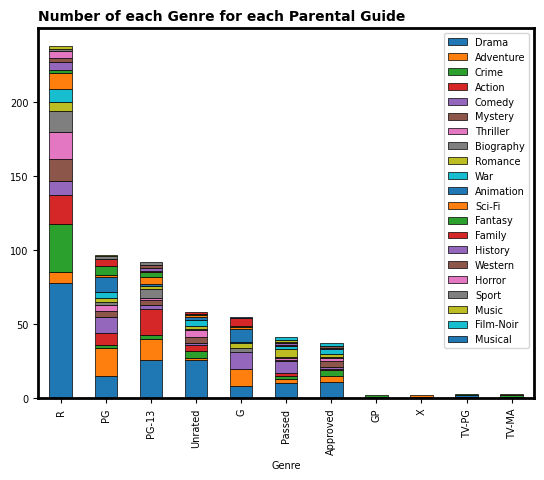

In [219]:
plt.figure(figsize = (50, 100))
plt.rcParams.update({"font.size": 7})
plt.rcParams["axes.linewidth"] = 2
ax = df.plot(x = "Genre", kind = "bar", stacked = True, edgecolor = "black", linewidth = 0.5)
ax.set_title("Number of each Genre for each Parental Guide", fontweight = "bold", fontsize = 10, loc = "left")

plt.show()

-------- PART THREE 🤟 --------

User Required Graph 🏭

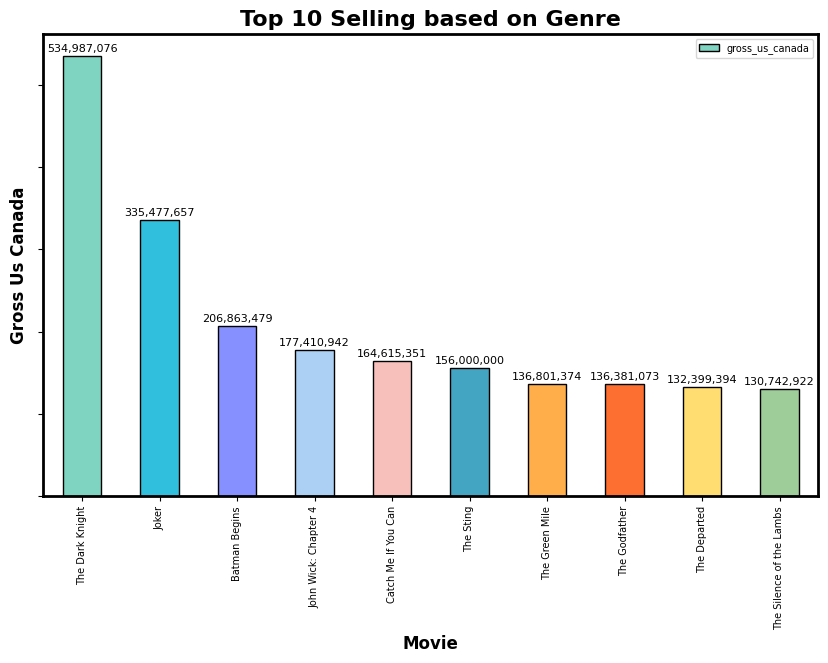

In [256]:
user_required_genre = input("Please provide the Genre : ")
sorted_df = IMDB_df.sort_values("gross_us_canada", ascending = False)

movie_title_list, gross_us_canada_list = [], []

for i in range(len(sorted_df)):
      if user_required_genre in sorted_df.loc[i, "genre"]:
            movie_title_list += [sorted_df.loc[i, "title"]]
            gross_us_canada_list += [sorted_df.loc[i, "gross_us_canada"]]

required_genre_df = pd.DataFrame({"movie" : movie_title_list, "gross_us_canada" : gross_us_canada_list})
required_genre_df = required_genre_df.sort_values("gross_us_canada", ascending = False)
#display(required_genre_df)

colors = ["#7FD4C1", "#30BFDD", "#8690FF", "#ACD0F4", "#F7C0BB", "#44a5c2", "#ffae49", "#FD6F30", "#FFDD71", "#9FCD99"]
ax = required_genre_df.head(10).plot.bar(x = "movie", y = "gross_us_canada", rot = 90, color = colors, figsize = (10, 6), edgecolor = "black")
ax.set_title("Top 10 Selling based on Genre", fontweight = "bold", fontsize = 16)
ax.set_xlabel("Movie", fontweight = "bold", fontsize = 12)
ax.set_ylabel("Gross Us Canada", fontweight = "bold", fontsize = 12)
ax.set_yticklabels([])

for p in ax.patches:
    ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", va = "center", fontsize = 8, color = "black", xytext=(0, 5), textcoords = "offset points")

plt.show()

-------- PART FOUR 🤙 --------

Word Cloud of Movies based on Genre 🌨

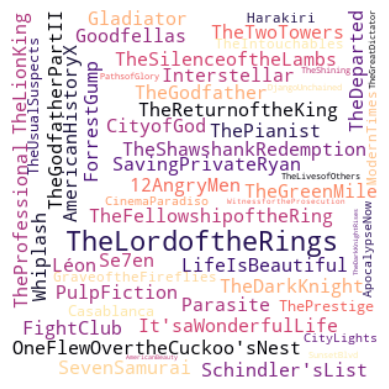

In [282]:
user_required_genre_cloud = input("Please provide the Genre : ")
user_required_number_cloud = int(input("Please provide number of movies : "))

cloud_list = []

for i in range(len(IMDB_df)):
      if user_required_genre_cloud in IMDB_df.loc[i, "genre"]:
            cloud_list += [IMDB_df.loc[i, "title"]]

for i in range(len(cloud_list)):
      cloud_list[i] = cloud_list[i].replace(" ", "")

if user_required_number_cloud > len(cloud_list):
      print("There are only - " + str(len(cloud_list)) + " -  names available !")
      user_required_number_cloud = len(cloud_list)

text = ""
for i in range(user_required_number_cloud):
      text += cloud_list[i]
      text += " "

wc = WordCloud(width = 300, height = 300, background_color = "white", colormap = "magma")
wc.generate(text)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()